# PROBLEM STATEMENT

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [5]:
house_df = pd.read_csv("kc_house_data.csv")

In [6]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# STEP #2: VISUALIZE DATASET

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

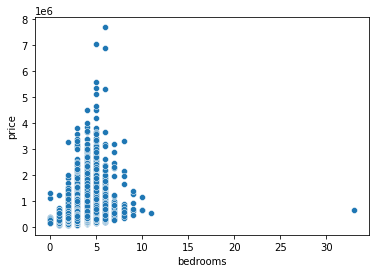

In [10]:
sns.scatterplot(x = house_df["bedrooms"],y=house_df["price"])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

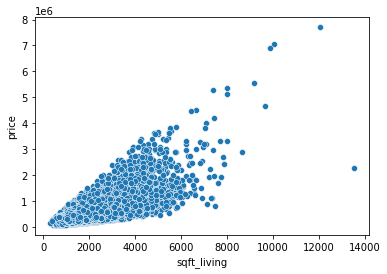

In [11]:
sns.scatterplot(x = house_df['sqft_living'], y = house_df['price'])

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

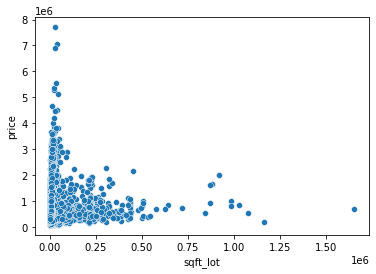

In [12]:
sns.scatterplot(x = house_df['sqft_lot'], y = house_df['price'])

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [13]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [15]:
y = house_df['price']

# STEP#4: TRAINING THE MODEL

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-3.36123771e+04  3.95498875e+04  9.33653731e+01  1.48114595e-01
  5.16714789e+03  4.13752203e+01  5.19901529e+01  5.57436135e+05
  5.10371684e+04  2.53900630e+04  9.74744112e+04  4.13752204e+01
 -2.57624718e+03  2.22011112e+01 -5.99067635e+02  6.06618816e+05
 -2.15870678e+05  2.42797459e+01 -3.57452412e-01]
Linear Model Coefficient (b):  7907528.219775387


# STEP #5: EVALUATE MODEL

In [18]:
y_predict = regressor.predict( X_test)
y_predict

array([333476.94759089, 293012.70531567, 423588.59575345, ...,
       611889.1812196 , 787872.56965248, 435955.37015832])

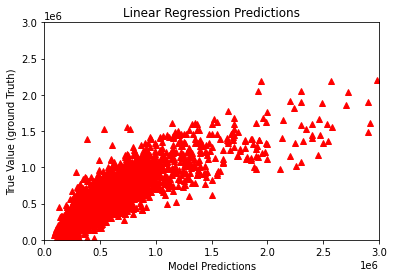

In [19]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [20]:
k = X_test.shape[1]
n = len(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 203861.632 
MSE = 41559564855.73839 
MAE = 124793.35842709246 
R2 = 0.7098063888788673 
Adjusted R2 = 0.7085250320089389


# RIDGE REGRESSION

In [22]:
from sklearn.linear_model import Lasso, Ridge
regressor_ridge = Ridge(alpha = 50)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_predict = regressor_ridge.predict( X_test)
y_predict

Linear Model Coefficient (m):  [-3.49178199e+04  3.97025450e+04  9.47574614e+01  1.17871426e-01
  8.90810469e+03  4.01001780e+01  5.46573068e+01  3.85241862e+05
  5.77560224e+04  2.45303797e+04  1.00292408e+05  4.01001767e+01
 -2.72810426e+03  2.25208750e+01 -4.94764700e+02  5.12319026e+05
 -1.67647196e+05  2.34097061e+01 -3.87132085e-01]
Linear Model Coefficient (b):  8338566.090808097


array([328644.10341304, 290125.46006932, 447855.73802103, ...,
       618933.76687217, 783034.4662176 , 424691.63989963])

# LASSO REGRESSION

In [23]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 500)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test)
y_predict

Linear Model Coefficient (m):  [-3.31127178e+04  3.78930649e+04  2.61150251e+02  1.31345534e-01
  4.58400056e+03  3.20522224e+01 -1.13110777e+02  4.84522071e+05
  5.36078963e+04  2.37088670e+04  9.87175319e+04 -1.16688679e+02
 -2.63918139e+03  2.25912822e+01 -5.29648467e+02  5.74112331e+05
 -1.71673780e+05  2.28892040e+01 -3.83590849e-01]
Linear Model Coefficient (b):  8171259.420739047


/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328163329636845.6, tolerance: 229380413839.2239
  model = cd_fast.enet_coordinate_descent(


array([330617.48155302, 289582.32362176, 431673.87286758, ...,
       613519.33771907, 786966.17255253, 436546.07253128])

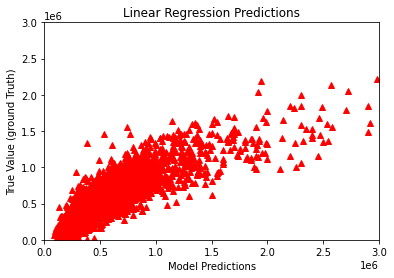

In [24]:

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 204336.601 
MSE = 41753446537.021935 
MAE = 124581.75562882704 
R2 = 0.7084525916142133 
Adjusted R2 = 0.7071652570199001


# EXCELLENT JOB! 